In [1]:
import scipy.stats as stats
import pandas as pd
import scipy
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

# Задания для самостоятельного решения

## 1. Найдите минимально необходимый объем выборки
для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

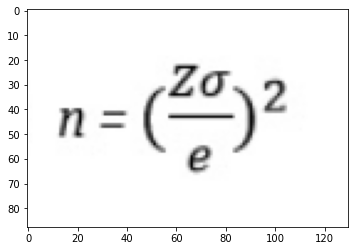

In [2]:
plt.imshow(cv2.imread("formuls.PNG"));

In [3]:
sigma = 15 # 15 ** 2 = 255
Z = 1.96  # для β = 0.95
e = 3

N = (sigma * Z / e) ** 2
N

96.03999999999998

## 2. Вам даны две выборки роста мужчин и женщин. 
Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

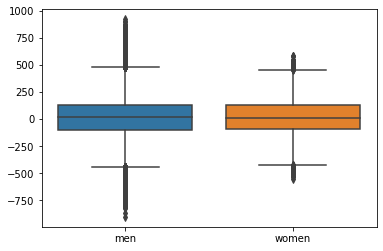

In [4]:
population_men = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

data = pd.DataFrame([population_men, population_women]).T
data.columns = ['men', 'women']
sns.boxplot(data=data);

## ?????? Не совсем понятно, должно быть:
The location (loc) keyword specifies the mean.

The scale (scale) keyword specifies the standard deviation.

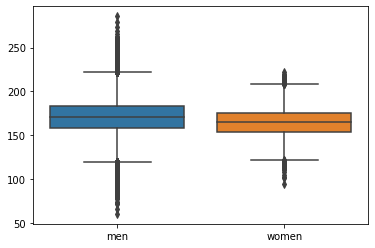

In [5]:
population_men = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

data = pd.DataFrame([population_men, population_women]).T
data.columns = ['men', 'women']
sns.boxplot(data=data);

In [6]:
### Ваш код...
alpha = 0.001
# H0 - различия между выборками статистически не значимы
# H1 - различия между выборками значимы
ttest = stats.ttest_ind(population_men, population_women)
ttest, ttest[1] < alpha

(Ttest_indResult(statistic=34.58062457419617, pvalue=5.104350180337292e-262),
 True)

pvalue < 0.001

Отвергаем нулевую гипотезу

Различия между выборками различны



In [7]:
# Но, если средний рост мужчин 19, а женщин 16, тогда получим результаты с которыми мы не сможем отвергнуть нулевую гипотезу

## 3. Определите объем необходимой выборки
для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [8]:
sigma = 150 
Z = 1.96  # для β = 0.95
e = 50

N = (sigma * Z / e) ** 2
N

34.5744

## 4.  Представьте, что вы хотите разоблачить "волшебника",
который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце.

Вы пронаблюдали за ответами "волшебника" в течении какого-то ?? периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [9]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [10]:
oddsratio, pvalue = scipy.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.

### Ваш код...
oddsratio, pvalue

(2.037037037037037, 0.08323639416753109)

Н0 - существует значимое различие между реальностью и ответами волшебника

Н1 - значимых различий нет

p_value > 0.05

Гипотезу о том что различий нет не отвергаем

In [11]:
stats.chi2_contingency(observations)

(2.604890247290914,
 0.10653453263099501,
 1,
 array([[20.33333333, 40.66666667],
        [19.66666667, 39.33333333]]))

## 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:

data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [12]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]
confidence = 0.9

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h, h

### Ваш код...
mean_confidence_interval(data, confidence)

(5.843062450077532, 6.4411764705882355, 7.039290491098939, 0.5981140205107036)

## 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [13]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

print(stats.ttest_ind(data_1, data_2, equal_var=False))
print(stats.mannwhitneyu(data_1, data_2))

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)
MannwhitneyuResult(statistic=462.0, pvalue=1.5430266928575232e-10)


Отвергаем нулевую гипотезу, о том что выборки из одного распреления

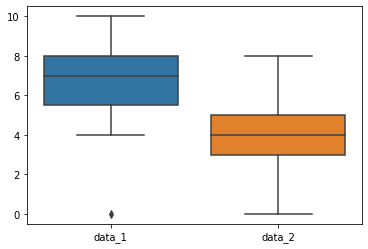

In [14]:
data = pd.DataFrame([data_1, data_2]).T
data.columns = ['data_1', 'data_2']
sns.boxplot(data=data);

In [15]:

np.array(data_1).var(), np.array(data_2).var()

(3.662040816326531, 3.127991675338189)

## 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Н0 - распределение нормальное

Н1 - распределение не нормальное

Принимаем уровень значимости $\alpha = 0.05$
p_value < $\alpha$

Гипотезу о нормальности распределения не отвергаем


Если примем более жесткий уровень значимости, например 0.01

Гипотезу о нормальности распределения отвергнем

ShapiroResult(statistic=0.9989004135131836, pvalue=0.8176282644271851)


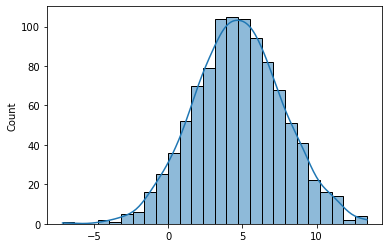

In [16]:
v = stats.norm.rvs(loc=5, scale=3, size=1000)
print(stats.shapiro(v))
sns.histplot(v, kde=True);

## 8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

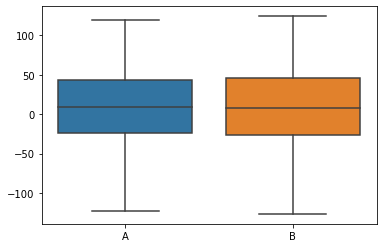

In [17]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)
data = pd.DataFrame([A, B]).T
data.columns = ['A', 'B']
sns.boxplot(data=data);
#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

In [18]:
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

а)

Н0 - различия статистически не значимы


Н1 - различия значимы


p_value > 0.05


Значит нулевую гипотезу о том что различия не значимы не отвергаем

б)
Не совсем понятный вопрос

Если мы принимаем уровень значимости $\alpha = 0.05$

то при любом  p_value < 0.05 (например 0.049999)


гипотезу о различии отвергнем
